In [109]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from tqdm import tqdm
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
sns.set()

# DATA PREPROCESSING

In [110]:
data = pd.read_csv('original_data/tracks.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [111]:
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [138]:
sample_data = data.sample(n = 10000, random_state = 50, ignore_index = True)

In [112]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [113]:
data.std()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5244\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


popularity              18.370642
duration_ms         126526.087418
explicit                 0.205286
danceability             0.166103
energy                   0.251923
key                      3.519423
loudness                 5.089328
mode                     0.474114
speechiness              0.179893
acousticness             0.348837
instrumentalness         0.266868
liveness                 0.184326
valence                  0.257671
tempo                   29.764108
time_signature           0.473162
dtype: float64

In [114]:
data.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
duration_ms,0.027681,1.000000,-0.016747,-0.120371,0.024825,0.004626,0.000337,-0.027610,-0.125771,-0.064434,0.069278,0.002137,-0.163202,-0.001210,0.037552
explicit,0.211758,-0.016747,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447
danceability,0.187000,-0.120371,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
key,0.015299,0.004626,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
mode,-0.033655,-0.027610,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892
speechiness,-0.047357,-0.125771,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.064434,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927


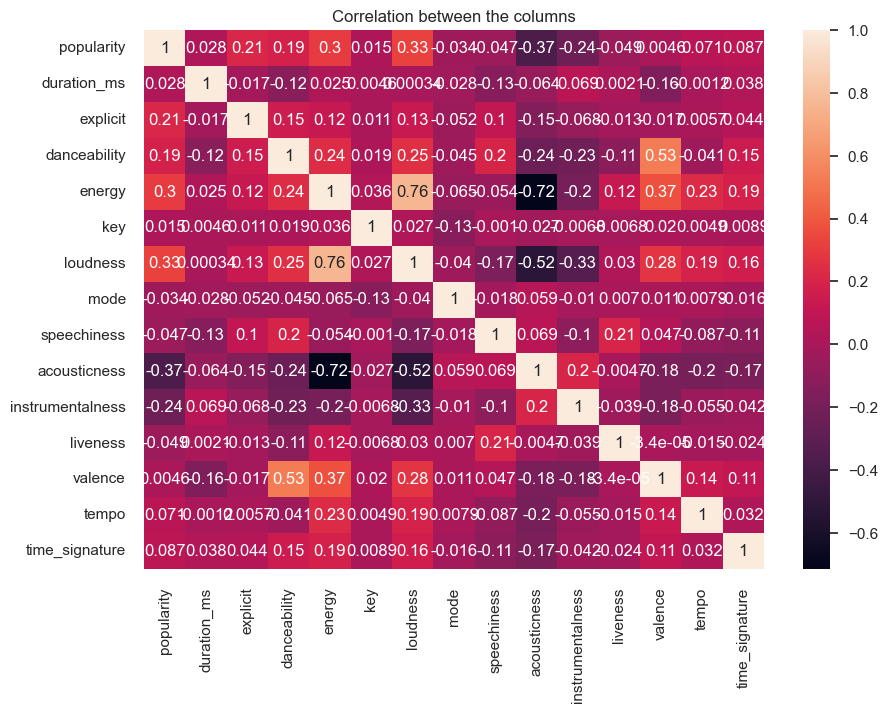

In [115]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

<AxesSubplot:ylabel='Frequency'>

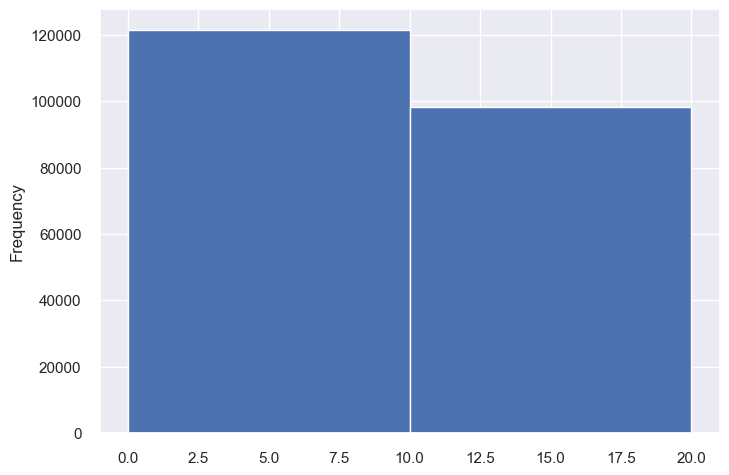

In [116]:
pd.Series(data['popularity']).plot(kind='hist', bins=[0,10,20])

<AxesSubplot:ylabel='Frequency'>

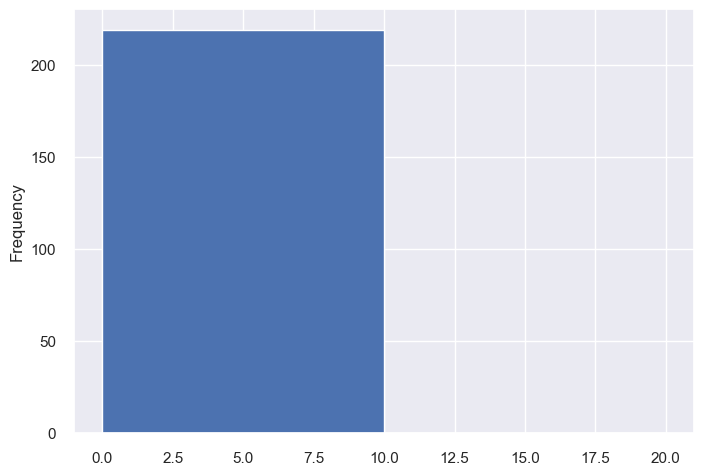

In [117]:
pd.Series(data['loudness']).plot(kind='hist', bins=[0,10,20])


# SAMPLING DATASET FOR EASIER COMPUTATION

In [118]:
df = data.drop(columns=['id','name','artists','id_artists','release_date'],axis=True)
df = df.sample(n = 100000, random_state = 50, ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        100000 non-null  int64  
 1   duration_ms       100000 non-null  int64  
 2   explicit          100000 non-null  int64  
 3   danceability      100000 non-null  float64
 4   energy            100000 non-null  float64
 5   key               100000 non-null  int64  
 6   loudness          100000 non-null  float64
 7   mode              100000 non-null  int64  
 8   speechiness       100000 non-null  float64
 9   acousticness      100000 non-null  float64
 10  instrumentalness  100000 non-null  float64
 11  liveness          100000 non-null  float64
 12  valence           100000 non-null  float64
 13  tempo             100000 non-null  float64
 14  time_signature    100000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 11.4 MB


In [119]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,27.540370,2.306329e+05,0.043240,0.563593,0.542120,5.204540,-10.210178,0.66127,0.105040,0.450284,0.113987,0.214142,0.552275,118.440730,3.874940
std,18.398438,1.306182e+05,0.203398,0.166006,0.251705,3.524291,5.092353,0.47328,0.180405,0.349258,0.267061,0.184589,0.257808,29.855104,0.471595
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.754670e+05,0.000000,0.453000,0.344000,2.000000,-12.914000,0.00000,0.033900,0.096200,0.000000,0.098200,0.345000,95.362750,4.000000
50%,27.000000,2.152000e+05,0.000000,0.576000,0.550000,5.000000,-9.238000,1.00000,0.044200,0.424000,0.000025,0.139000,0.564000,117.416000,4.000000
75%,41.000000,2.641600e+05,0.000000,0.686000,0.748000,8.000000,-6.484000,1.00000,0.076100,0.786000,0.010200,0.278000,0.769000,136.296250,4.000000
max,99.000000,5.403500e+06,1.000000,0.988000,1.000000,11.000000,4.362000,1.00000,0.971000,0.996000,1.000000,1.000000,0.999000,243.507000,5.000000


In [120]:
df.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

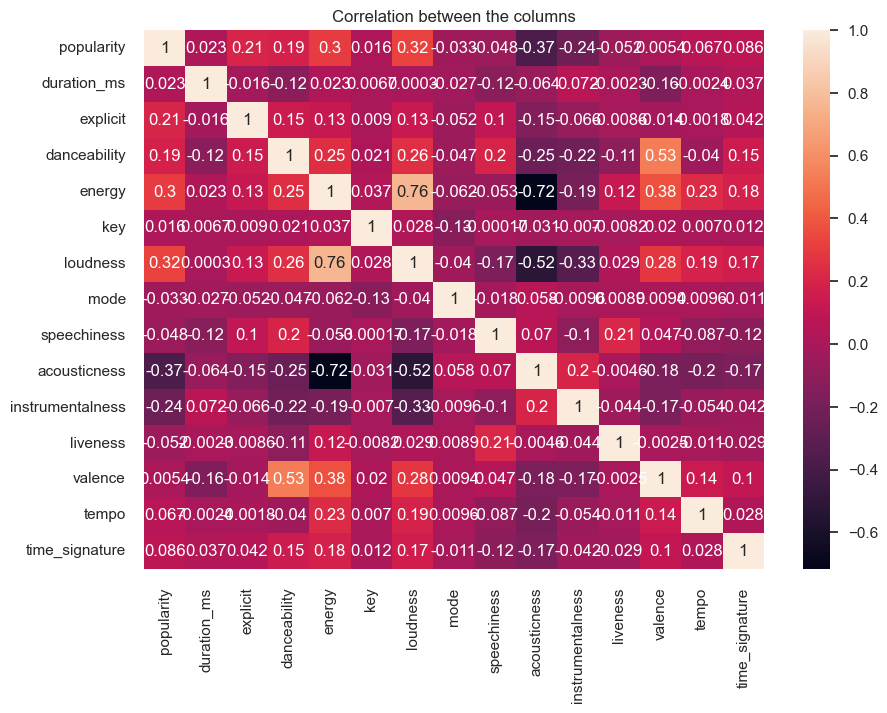

In [121]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

In [122]:
datatypes = ['int16','int32','int64','float16','float32','float64']
normalization = df.select_dtypes(include=datatypes)
for col in normalization.columns:
    MinMaxScaler(col)

# MODELLING

# K-MEANS CLUSTERING

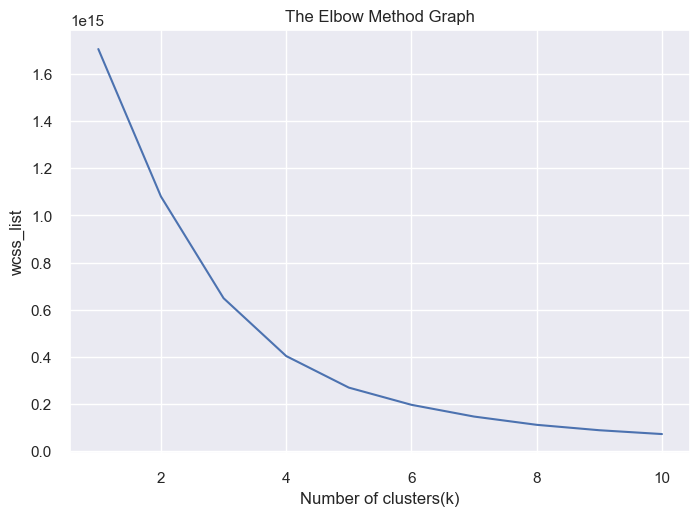

In [35]:
wcss_list= []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state= 42)  
    pred = kmeans.fit_predict(df)
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

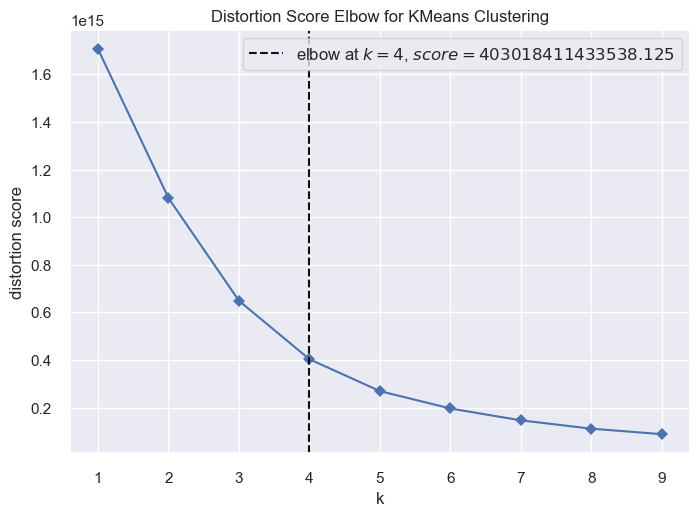

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(df)
visualizer.show()

# EVALUATION METRICS(INTRINSIC METRICS)

In [37]:
for i in range(2,6):  
    kmeans = kmeans.fit(df)
    labels = kmeans.predict(df)
    silhouettescore = silhouette_score(df, labels)
    print(f"silhouettescore {i} = {silhouettescore}")

silhouettescore 2 = 0.5261612214227476
silhouettescore 3 = 0.5261612214227476
silhouettescore 4 = 0.5261612214227476
silhouettescore 5 = 0.5261612214227476


In [38]:
for i in range(2,6):  
    kmeans = kmeans.fit(df)
    labels = kmeans.predict(df)
    calinskiharbazscore = calinski_harabasz_score(df, labels)
    print(f"calinskiharbazscore {i} = {calinskiharbazscore}")

calinskiharbazscore 2 = 229426.47051477272
calinskiharbazscore 3 = 229426.47051477272
calinskiharbazscore 4 = 229426.47051477272
calinskiharbazscore 5 = 229426.47051477272


In [39]:
for i in range(2,6):  
    kmeans = kmeans.fit(df)
    labels = kmeans.predict(df)
    daviesbouldinscore = davies_bouldin_score(df, labels)
    print(f"daviesbouldinscore {i} = {daviesbouldinscore}")

daviesbouldinscore 2 = 0.5087674380202212
daviesbouldinscore 3 = 0.5087674380202212
daviesbouldinscore 4 = 0.5087674380202212
daviesbouldinscore 5 = 0.5087674380202212


# K-MEANS++ CLUSTERING

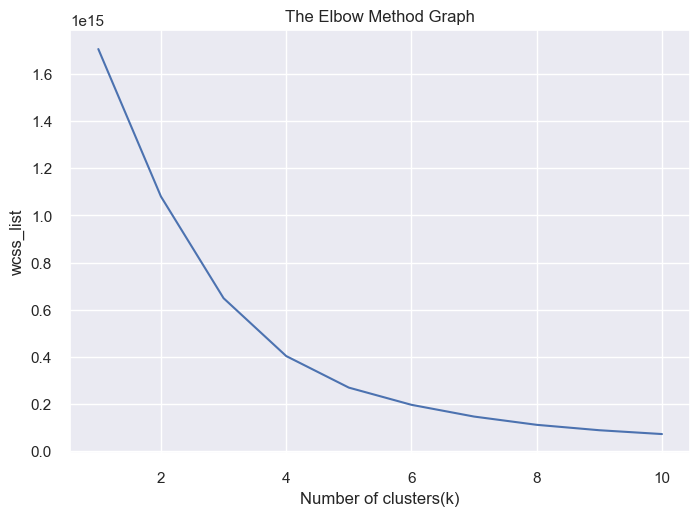

In [123]:
from sklearn.cluster import KMeans  
wcss_list= []  
for i in range(1, 11):  
    kmeansplus = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    pred = kmeansplus.fit_predict(df)
    wcss_list.append(kmeansplus.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

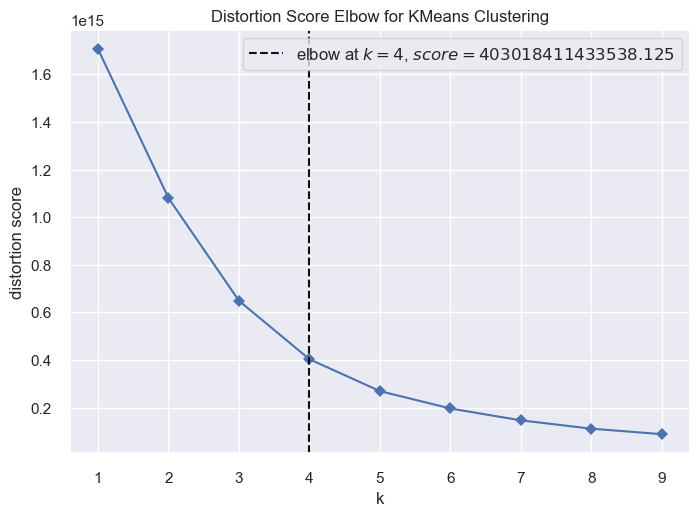

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeansplus, k=(1,10), timings=False)
visualizer.fit(df)
visualizer.show()

# EVALUATION METRICS(INTRINSIC MEASURES)

In [42]:
for i in range(2,6):  
    kmeansplus = kmeansplus.fit(df)
    labels = kmeansplus.predict(df)
    silhouettescore_plus = silhouette_score(df, labels)
    print(f"silhouettescore_plus {i} = {silhouettescore_plus}")

silhouettescore_plus 2 = 0.5261612214227476
silhouettescore_plus 3 = 0.5261612214227476
silhouettescore_plus 4 = 0.5261612214227476
silhouettescore_plus 5 = 0.5261612214227476


In [43]:
for i in range(2,6):  
    kmeansplus = kmeansplus.fit(df)
    labels = kmeansplus.predict(df)
    calinskiharbazscore_plus = calinski_harabasz_score(df, labels)
    print(f"calinskiharbazscore_plus {i} = {calinskiharbazscore_plus}")

calinskiharbazscore_plus 2 = 229426.47051477272
calinskiharbazscore_plus 3 = 229426.47051477272
calinskiharbazscore_plus 4 = 229426.47051477272
calinskiharbazscore_plus 5 = 229426.47051477272


In [44]:
for i in range(2,6):  
    kmeansplus = kmeansplus.fit(df)
    labels = kmeansplus.predict(df)
    daviesbouldinscore_plus = davies_bouldin_score(df, labels)
    print(f"daviesbouldinscore_plus {i} = {daviesbouldinscore_plus}")

daviesbouldinscore_plus 2 = 0.5087674380202212
daviesbouldinscore_plus 3 = 0.5087674380202212
daviesbouldinscore_plus 4 = 0.5087674380202212
daviesbouldinscore_plus 5 = 0.5087674380202212


# AGGLOMERATIVE CLUSTERING 

In [45]:
sample_df = df.sample(n=10000, random_state=50)

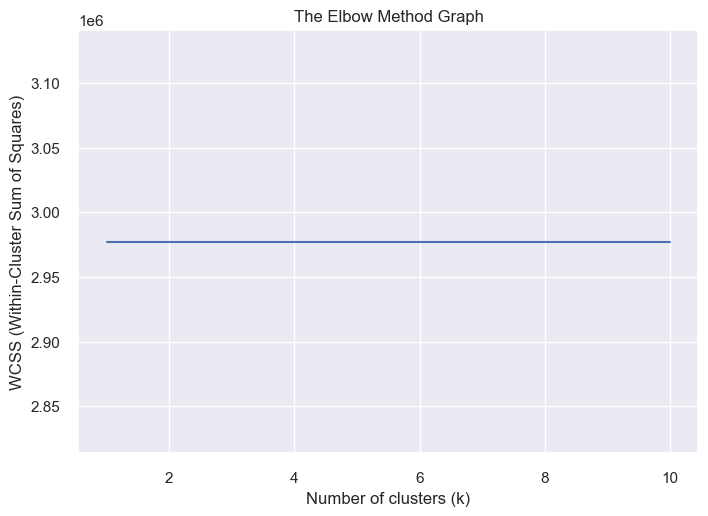

In [46]:
wcss_list = []
for i in range(1, 11):
    agglomerative = AgglomerativeClustering(n_clusters=i)
    pred = agglomerative.fit_predict(sample_df)
    linkage_matrix = linkage(sample_df, method='average')
    linkage_distance = linkage_matrix[-1, 2]
    wcss_list.append(linkage_distance)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


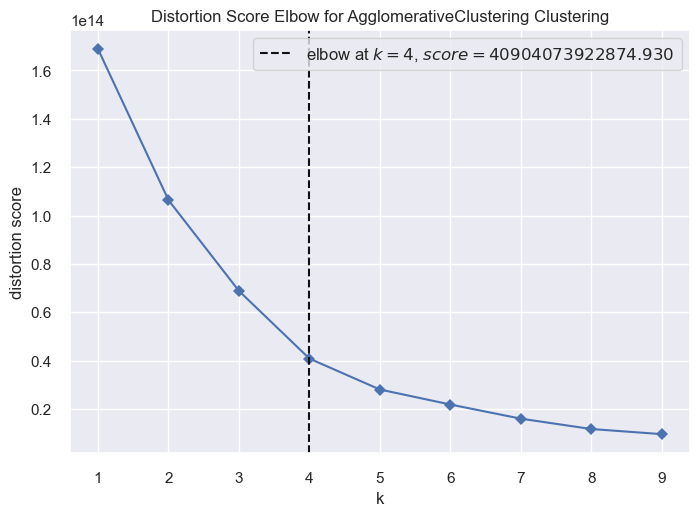

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
visualizer = KElbowVisualizer(agglomerative, k=(1,10), timings=False)
visualizer.fit(sample_df)
visualizer.show()

# EVALUATION METRICS(INTRINSIC METRICS)

In [48]:
for i in range(2,6):  
    pred = agglomerative.fit_predict(sample_df)
    silhouettescore_agglomerative = silhouette_score(sample_df, pred)
    print(f"silhouettescore_agglomerative {i} = {silhouettescore_agglomerative}")

silhouettescore_agglomerative 2 = 0.5005159896360426
silhouettescore_agglomerative 3 = 0.5005159896360426
silhouettescore_agglomerative 4 = 0.5005159896360426
silhouettescore_agglomerative 5 = 0.5005159896360426


In [49]:
for i in range(2,6):  
    pred = agglomerative.fit_predict(sample_df)
    calinskiharbazscore_agglomerative = calinski_harabasz_score(sample_df, pred)
    print(f"calinskiharbazscore_agglomerative {i} = {calinskiharbazscore_agglomerative}")

calinskiharbazscore_agglomerative 2 = 20543.04345461829
calinskiharbazscore_agglomerative 3 = 20543.04345461829
calinskiharbazscore_agglomerative 4 = 20543.04345461829
calinskiharbazscore_agglomerative 5 = 20543.04345461829


In [50]:
for i in range(2,6):  
    pred = agglomerative.fit_predict(sample_df)
    daviesbouldinscore_agglomerative = davies_bouldin_score(sample_df, pred)
    print(f"daviesbouldinscore_agglomerative {i} = {daviesbouldinscore_agglomerative}")

daviesbouldinscore_agglomerative 2 = 0.500209192977068
daviesbouldinscore_agglomerative 3 = 0.500209192977068
daviesbouldinscore_agglomerative 4 = 0.500209192977068
daviesbouldinscore_agglomerative 5 = 0.500209192977068


# Training the model again for optimal number of clusters

In [124]:
kmeansplus = KMeans(n_clusters=4, init='k-means++', random_state = 42)
Clusters = kmeansplus.fit_predict(df)

In [125]:
df['Clusters'] = Clusters
MinMaxScaler(df['Clusters'])

MinMaxScaler(feature_range=0        2
1        0
2        0
3        2
4        0
        ..
99995    0
99996    0
99997    0
99998    2
99999    0
Name: Clusters, Length: 100000, dtype: int32)

In [53]:
#from sklearn.cluster import KMeans  
#kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
#features = kmeans.fit_predict(df) 
#df['features'] = features
#MinMaxScaler(df['features'])

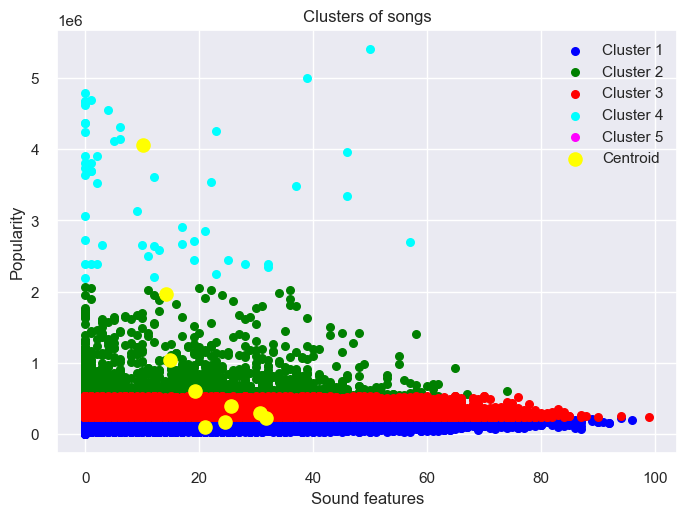

In [54]:
df = np.array(df)
plt.scatter(df[Clusters == 0, 0], df[Clusters == 0, 1], s = 30, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(df[Clusters == 1, 0], df[Clusters == 1, 1], s = 30, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(df[Clusters== 2, 0], df[Clusters == 2, 1], s = 30, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(df[Clusters == 3, 0], df[Clusters == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(df[Clusters == 4, 0], df[Clusters == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 90, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of songs')  
plt.xlabel('Sound features')   

plt.ylabel('Popularity')  
plt.legend()  
plt.show()  


# RECOMMENDING BASED ON DISTANCE METRICS

In [147]:
class Music_recommender():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs_list, amount=5):
        recommendations = []
        for song_name in songs_list:
            distance = []
            song = self.dataset[(self.dataset.name.str.lower() == song_name.lower())].head(1).values[0]
            rec = self.dataset[self.dataset.name.str.lower() != song_name.lower()]
            for songs in rec.values:
                d = 0
                for col in np.arange(len(rec.columns)):
                    if not col in [0, 1, 5, 6, 7]:
                        d = d + np.absolute(float(song[col]) - float(songs[col]))
                distance.append(d)
            rec['distance'] = distance
            rec = rec.sort_values('distance').head(2)  # sort by distance and take top 2
            columns = ['artists','name']
            recommendations.append(rec[columns])
        return recommendations

distrecommendations = Music_recommender(data)
distrecommendations = distrecommendations.recommend(["counting stars", "night changes", "lean on"], 8) 
distrecommendations_df = pd.concat(distrecommendations, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5244\2307908771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5244\2307908771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5244\2307908771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [149]:
distrecommendations_df = pd.concat(recommendations, ignore_index=True)
print(distrecommendations_df)

               artists                                 name
0      ['Greg Fieler']                   Old Fashioned Girl
1  ['Grandcubby Trio']                   Carol of the Bells
2              ['Uli']                                Carve
3  ['Fernando Pessoa']  Capítulo 2.16 - Banquero Anarquista
4              ['Uli']                                Carve
5  ['Fernando Pessoa']  Capítulo 2.16 - Banquero Anarquista


# THE ACTUAL KMEANS RECOMMENDATIONS

In [146]:
class Music_recommender():
    def __init__(self, dataset):
        self.dataset = dataset
    
    def recommend(self, songs_list, amount=5):
        recommendations = []
        data = self.dataset.select_dtypes(include='number')
        kmeansplus.fit(data)
        
        for song_name in songs_list:
            song = self.dataset[(self.dataset.name.str.lower() == song_name.lower())].head(1).iloc[0]
            song_features = song[data.columns]
            cluster_label = kmeansplus.predict([song_features])[0]
            
            cluster_indices = np.where(kmeansplus.labels_ == cluster_label)[0]
            cluster_songs = self.dataset.iloc[cluster_indices]
            cluster_songs = cluster_songs[cluster_songs.name.str.lower() != song_name.lower()] 
            
            recommendations.append(cluster_songs[['artists', 'name']].head(2))
        
        return recommendations

recommendations = Music_recommender(data)
recommendations = recommendations.recommend(["counting stars", "night changes", "lean on"], 8) 
recommendations_df = pd.concat(recommendations, ignore_index=True)
print(recommendations_df)


C:\Users\ASUS\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


               artists                                 name
0      ['Greg Fieler']                   Old Fashioned Girl
1  ['Grandcubby Trio']                   Carol of the Bells
2              ['Uli']                                Carve
3  ['Fernando Pessoa']  Capítulo 2.16 - Banquero Anarquista
4              ['Uli']                                Carve
5  ['Fernando Pessoa']  Capítulo 2.16 - Banquero Anarquista


In [134]:
recommendations_df = pd.concat(recommendations, ignore_index=True)
print(recommendations_df)

               artists                                 name
0      ['Greg Fieler']                   Old Fashioned Girl
1  ['Grandcubby Trio']                   Carol of the Bells
2      ['Greg Fieler']                   Old Fashioned Girl
3  ['Grandcubby Trio']                   Carol of the Bells
4              ['Uli']                                Carve
5  ['Fernando Pessoa']  Capítulo 2.16 - Banquero Anarquista
